In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df_electronics=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\datasets\\electronics_health.csv")
df_electronics 

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
0,1,93.528723,2.0,5.439033,7.209497
1,2,71.375648,NaN,3.218983,5.430805
2,3,80.296978,4.0,7.105256,7.816981
3,4,31.145165,3.0,4.142490,5.611059
4,5,26.985564,4.0,3.091839,2.993757
...,...,...,...,...,...
5995,5996,63.799532,7.0,9.295115,4.571508
5996,5997,27.569519,NaN,5.634933,5.595495
5997,5998,22.151730,18.0,4.648565,7.324826
5998,5999,22.099421,2.0,9.301840,8.818505


In [3]:
df_electronics.shape

(6000, 5)

In [4]:
df_electronics.head()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
0,1,93.528723,2.0,5.439033,7.209497
1,2,71.375648,NaN,3.218983,5.430805
2,3,80.296978,4.0,7.105256,7.816981
3,4,31.145165,3.0,4.142490,5.611059
4,5,26.985564,4.0,3.091839,2.993757


In [5]:
df_electronics.tail()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
5995,5996,63.799532,7.0,9.295115,4.571508
5996,5997,27.569519,NaN,5.634933,5.595495
5997,5998,22.151730,18.0,4.648565,7.324826
5998,5999,22.099421,2.0,9.301840,8.818505
5999,6000,39.751796,NaN,1.798906,6.386953


In [6]:
df_electronics.isna().sum()

Car_ID                           0
Battery_Health                 508
Sensor_Error_Rate              509
Wiring_Condition_Score         364
Electronics_Remaining_Years      0
dtype: int64

In [7]:
df_electronics.dtypes

Car_ID                           int64
Battery_Health                 float64
Sensor_Error_Rate              float64
Wiring_Condition_Score         float64
Electronics_Remaining_Years    float64
dtype: object

In [8]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Car_ID                       6000 non-null   int64  
 1   Battery_Health               5492 non-null   float64
 2   Sensor_Error_Rate            5491 non-null   float64
 3   Wiring_Condition_Score       5636 non-null   float64
 4   Electronics_Remaining_Years  6000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 234.5 KB


In [9]:
df_electronics.describe()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
count,6000.000000,5492.000000,5491.000000,5636.000000,6000.000000
mean,3000.500000,57.061315,4.852122,5.000222,6.318032
std,1732.195139,24.710253,5.972339,2.854797,2.483654
min,1.000000,5.009811,0.000000,0.001425,0.100000
25%,1500.750000,36.358648,2.000000,2.536938,4.651716
50%,3000.500000,57.127780,3.000000,5.006592,6.527272
75%,4500.250000,78.187379,5.000000,7.419709,8.263831
max,6000.000000,99.999806,39.000000,9.998157,10.000000


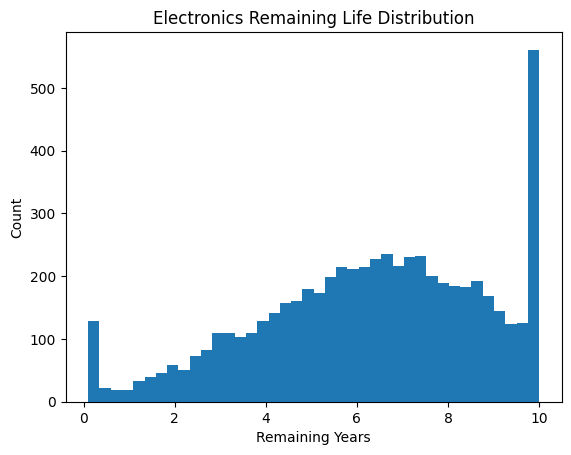

In [10]:
plt.hist(df_electronics["Electronics_Remaining_Years"], bins=40)
plt.xlabel("Remaining Years")
plt.ylabel("Count")
plt.title("Electronics Remaining Life Distribution")
plt.show()


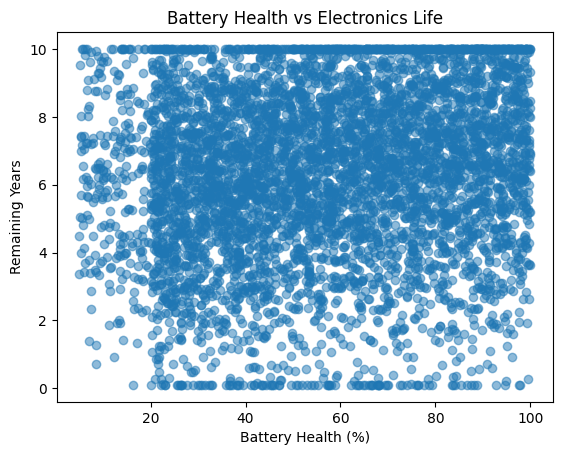

In [11]:
plt.scatter(
    df_electronics["Battery_Health"],
    df_electronics["Electronics_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Battery Health (%)")
plt.ylabel("Remaining Years")
plt.title("Battery Health vs Electronics Life")
plt.show()


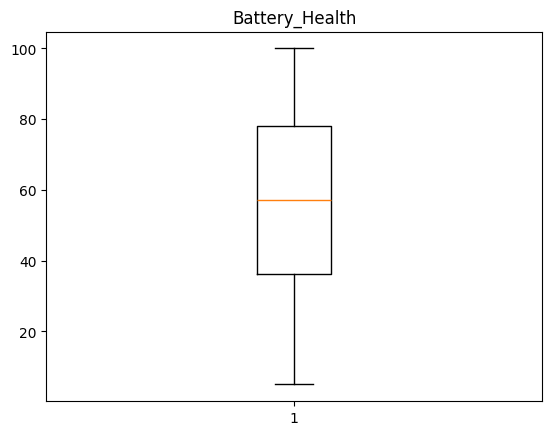

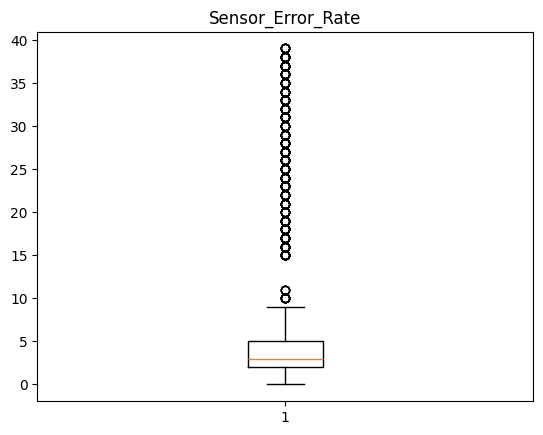

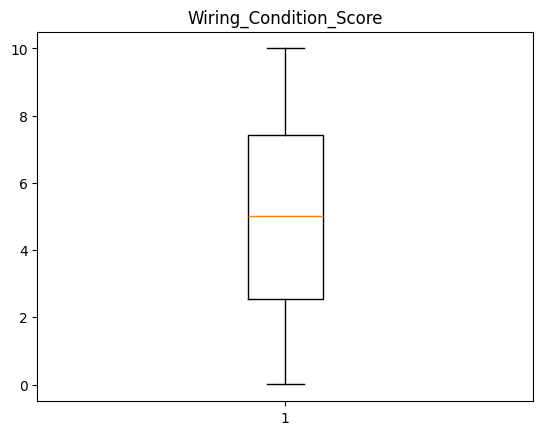

In [12]:
features = [
    "Battery_Health",
    "Sensor_Error_Rate",
    "Wiring_Condition_Score"
]

for col in features:
    plt.boxplot(df_electronics[col].dropna())
    plt.title(col)
    plt.show()


In [13]:
feature_cols = [
    "Battery_Health",
    "Sensor_Error_Rate",
    "Wiring_Condition_Score"
    
]
df_electronics['Sensor_Error_Rate']=df_electronics['Sensor_Error_Rate'].fillna(df_electronics['Sensor_Error_Rate'].mode()[0])
for col in feature_cols:
    df_electronics[col] = df_electronics[col].fillna(df_electronics[col].median())

In [14]:
df_electronics.isna().sum()

Car_ID                         0
Battery_Health                 0
Sensor_Error_Rate              0
Wiring_Condition_Score         0
Electronics_Remaining_Years    0
dtype: int64

In [15]:
x = df_electronics.drop(
    columns=["Electronics_Remaining_Years", "Car_ID"]
)
y = df_electronics["Electronics_Remaining_Years"]

In [16]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [17]:
df_electronics.describe()

,Car_ID,Battery_Health,Sensor_Error_Rate,Wiring_Condition_Score,Electronics_Remaining_Years
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,57.066942,4.695000,5.000608,6.318032
std,1732.195139,23.640879,5.736619,2.766832,2.483654
min,1.000000,5.009811,0.000000,0.001425,0.100000
25%,1500.750000,38.330723,2.000000,2.690403,4.651716
50%,3000.500000,57.127780,3.000000,5.006592,6.527272
75%,4500.250000,76.083210,5.000000,7.266524,8.263831
max,6000.000000,99.999806,39.000000,9.998157,10.000000


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [19]:
model = RandomForestRegressor(
    n_estimators=220,
    max_depth=9,
    min_samples_leaf=10,
    random_state=42
)

model.fit(x_train, y_train)


,n_estimators,220
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 1.0661190433837813
RMSE: 1.3821348943971543
R2  : 0.6801891942091693


In [21]:
print("Train R2:", model.score(x_train, y_train))
print("Test R2 :", model.score(x_test, y_test))


Train R2: 0.7541066220551325
Test R2 : 0.6801891942091693


In [22]:
import joblib

joblib.dump(model, "electronics_model.pkl")


['electronics_model.pkl']